## Interpolate input weather data to dt = 0.5 to match amr wind dt ##

In [14]:
# Most recently tested against PySAM 4.2.0

# NOTE: at this stage this notebook is not running and needs to be updated

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import PySAM.Pvwattsv7 as pvwatts

### Read sample data

In [15]:
### Initial data file code ###
# data = pd.read_csv("NonAnnualSimulation-sample_data.csv")
# data["Timestamp"] = pd.DatetimeIndex(pd.to_datetime(data["Timestamp"], utc=True))
# data = data.set_index("Timestamp")
# data = data[data.index > "2018-05-10 12:30:00+0000"]  # select only after 10am UTC

### Flatirons data file code ###
data = pd.read_csv("Flatirons_wind_data-06-24-2024.txt", parse_dates=[["Timestamp","MST"]])
# data = pd.read_csv("Flatirons_solar_data-06-24-2024.csv")
print(data)

data["Timestamp"] = pd.DatetimeIndex(pd.to_datetime(data["Timestamp_MST"], utc=True))
data = data.set_index("Timestamp")
# data = data[data.index > "2018-05-10 12:30:00+0000"]  # select only after 10am UTC

           Timestamp_MST  Avg Wind Speed @ 80m [m/s]  \
0    2024-06-24 00:00:00                       3.225   
1    2024-06-24 00:01:00                       3.546   
2    2024-06-24 00:02:00                       3.728   
3    2024-06-24 00:03:00                       3.777   
4    2024-06-24 00:04:00                       3.507   
...                  ...                         ...   
1435 2024-06-24 23:55:00                       2.590   
1436 2024-06-24 23:56:00                       2.699   
1437 2024-06-24 23:57:00                       1.863   
1438 2024-06-24 23:58:00                       1.918   
1439 2024-06-24 23:59:00                       1.851   

      Avg Wind Speed (std dev) @ 80m [m/s]  Avg Wind Direction @ 80m [deg]  \
0                                    0.137                          196.80   
1                                    0.086                          202.80   
2                                    0.110                          200.00   
3              

In [16]:
data = data.drop(["Timestamp_MST"], axis=1)
data.head()

,Avg Wind Speed @ 80m [m/s],Avg Wind Speed (std dev) @ 80m [m/s],Avg Wind Direction @ 80m [deg],Avg Wind Direction (std dev) @ 80m [deg],Turbulence Intensity @ 80m
Timestamp,,,,,
2024-06-24 00:00:00+00:00,3.225,0.137,196.8,2.679,0.042
2024-06-24 00:01:00+00:00,3.546,0.086,202.8,1.891,0.024
2024-06-24 00:02:00+00:00,3.728,0.110,200.0,1.665,0.030
2024-06-24 00:03:00+00:00,3.777,0.109,199.3,3.682,0.029
2024-06-24 00:04:00+00:00,3.507,0.147,198.4,3.039,0.042


In [17]:
data.info()
# column_names = data.columns[1:]
# column_names_str = column_names.astype('str')
# col_names = [x for x in column_names_str]
# print(col_names)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1440 entries, 2024-06-24 00:00:00+00:00 to 2024-06-24 23:59:00+00:00
Data columns (total 5 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Avg Wind Speed @ 80m [m/s]                1440 non-null   float64
 1   Avg Wind Speed (std dev) @ 80m [m/s]      1440 non-null   float64
 2   Avg Wind Direction @ 80m [deg]            1440 non-null   float64
 3   Avg Wind Direction (std dev) @ 80m [deg]  1440 non-null   float64
 4   Turbulence Intensity @ 80m                1440 non-null   float64
dtypes: float64(5)
memory usage: 67.5 KB


In [18]:
data_resampled = data.resample("0.5S").asfreq()

data_resampled_filled = data_resampled.interpolate()
data_resampled_filled.head()

data_resampled_filled.info()



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 172681 entries, 2024-06-24 00:00:00+00:00 to 2024-06-24 23:59:00+00:00
Freq: 500L
Data columns (total 5 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Avg Wind Speed @ 80m [m/s]                172681 non-null  float64
 1   Avg Wind Speed (std dev) @ 80m [m/s]      172681 non-null  float64
 2   Avg Wind Direction @ 80m [deg]            172681 non-null  float64
 3   Avg Wind Direction (std dev) @ 80m [deg]  172681 non-null  float64
 4   Turbulence Intensity @ 80m                172681 non-null  float64
dtypes: float64(5)
memory usage: 7.9 MB


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

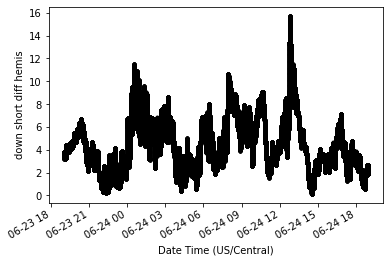

In [19]:
test = data_resampled_filled.index.tz_convert('US/Central')

fig, ax = plt.subplots(1,1, sharex="col")
ax.plot(test, data_resampled_filled["Avg Wind Speed @ 80m [m/s]"],'.k')
ax.set_ylabel('down short diff hemis')
ax.set_xlabel('Date Time (US/Central)')
fig.autofmt_xdate()
plt.tight_layout

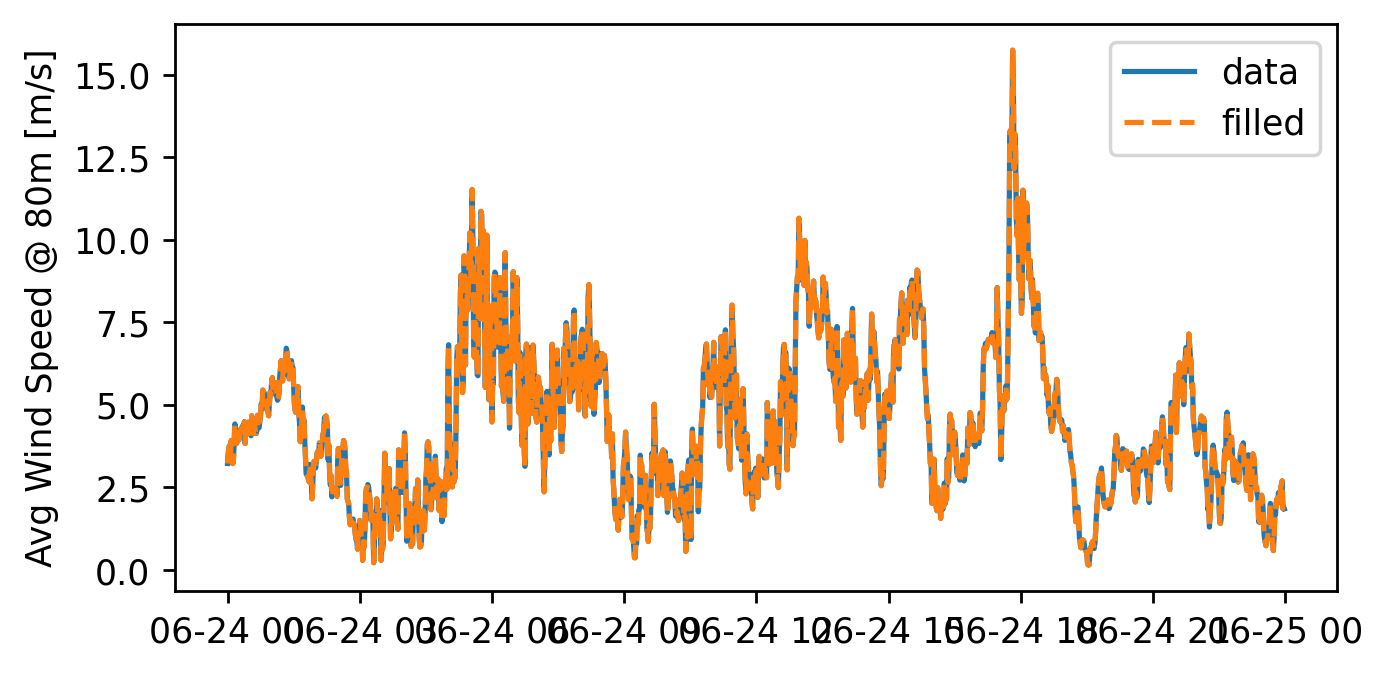

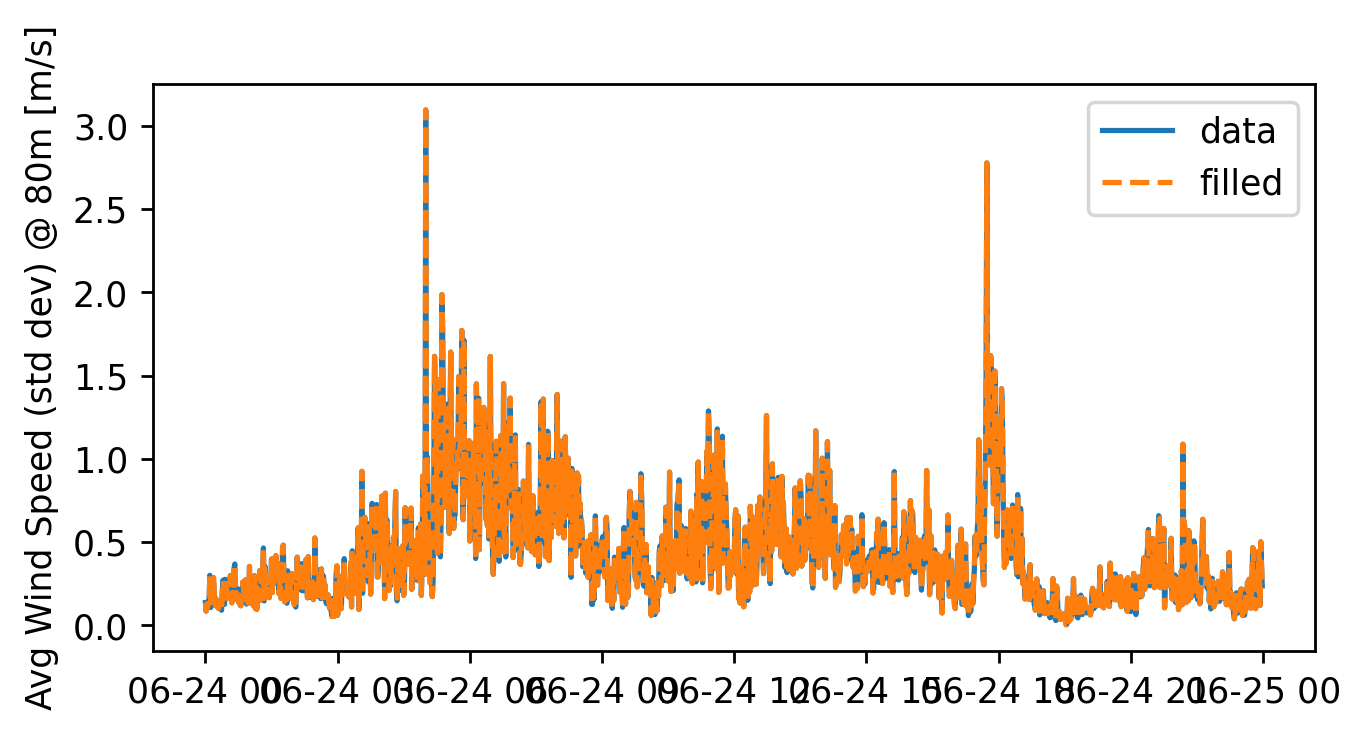

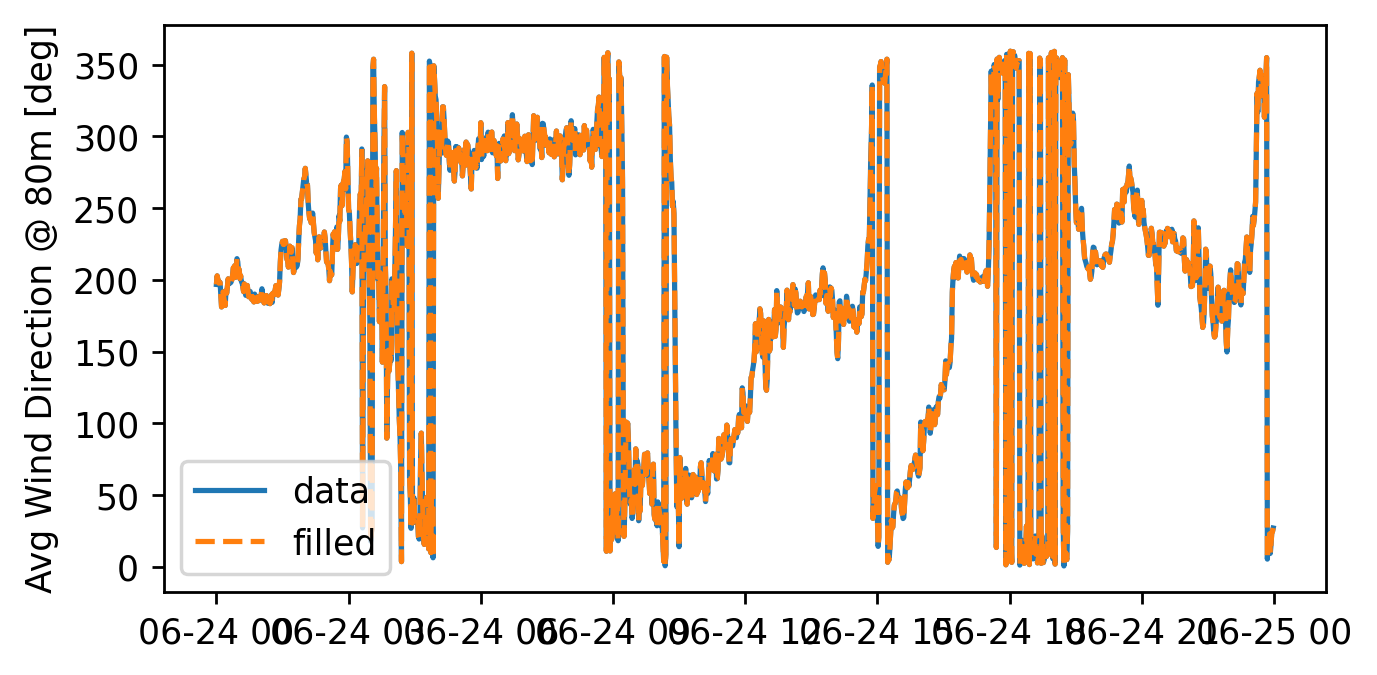

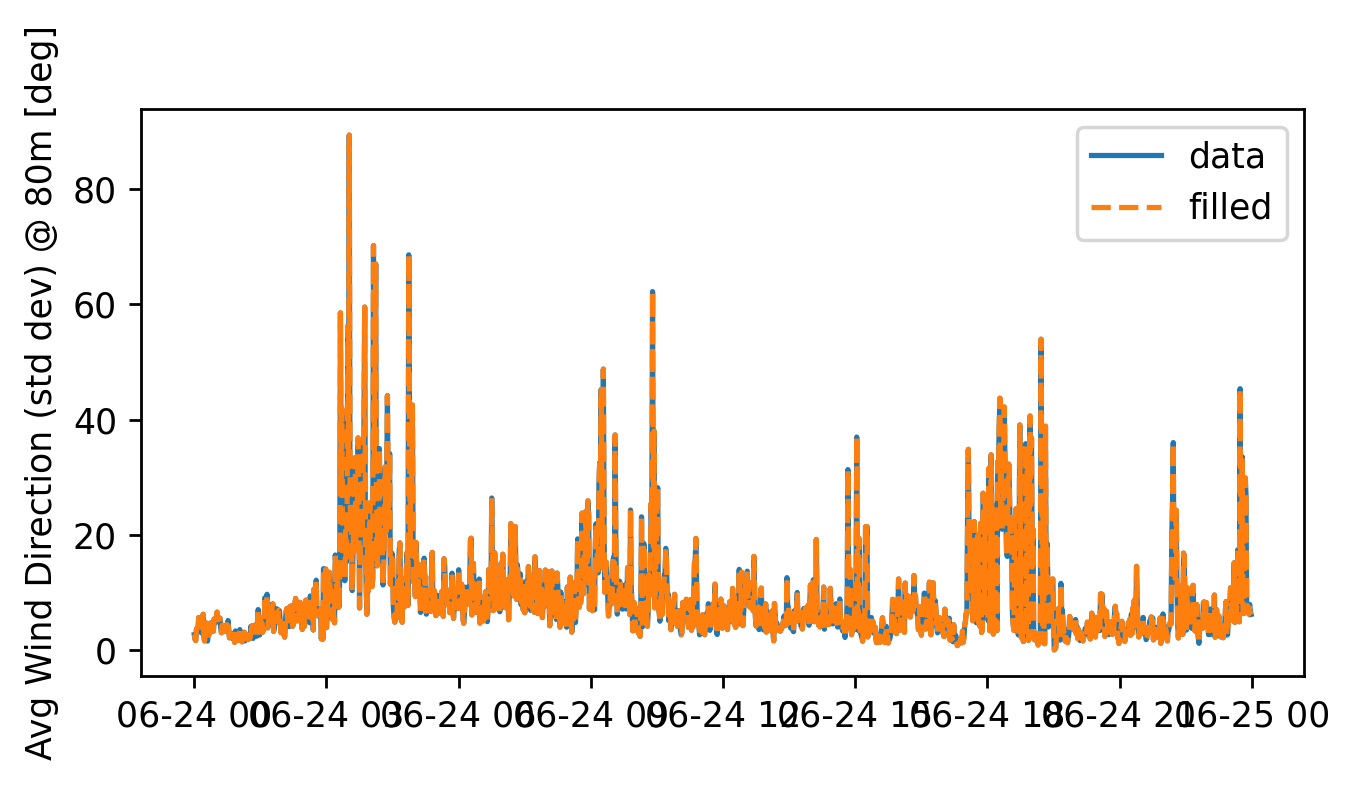

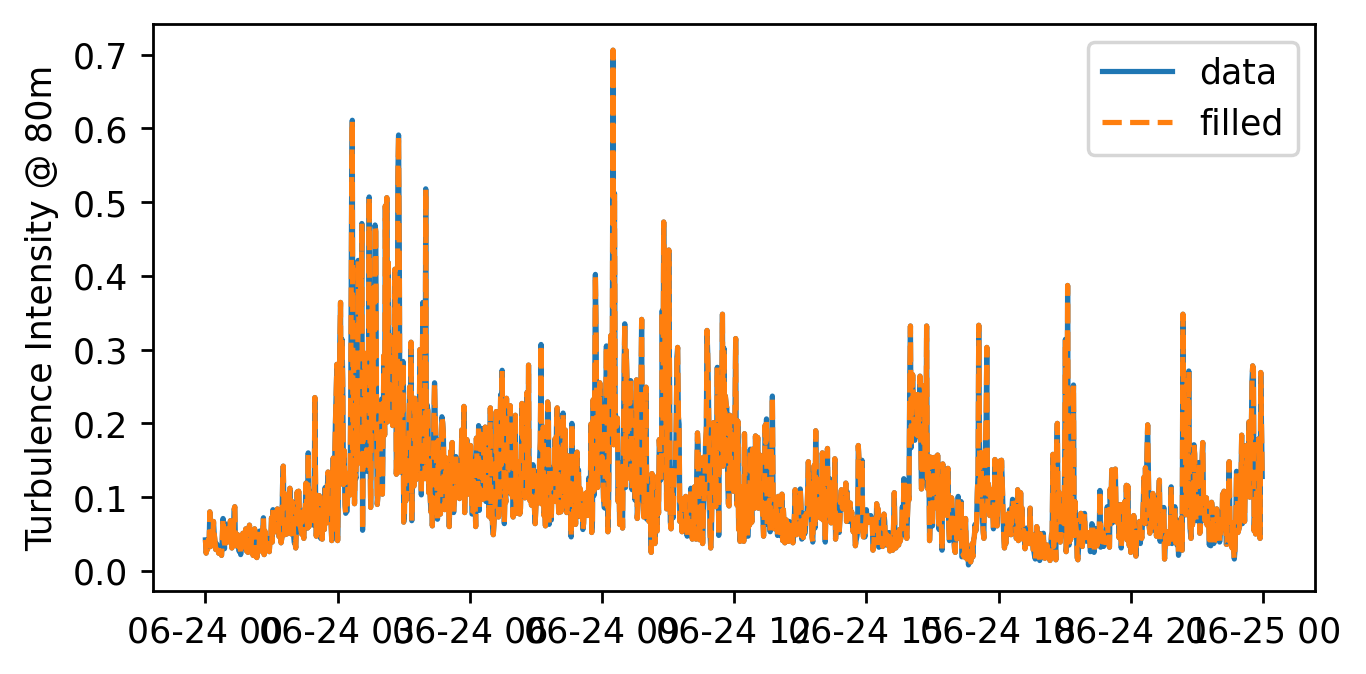

In [11]:
# data['SRRL BMS Direct Normal Irradiance (W/m²_irr)'].plot()
# data_resampled['SRRL BMS Direct Normal Irradiance (W/m²_irr)'].plot(style='.-')
# plt.legend(["data", "resampled"])
# plt.ylabel("Energy (kW)")

for col in data.columns:
    fig, ax = plt.subplots(figsize=[6, 3], dpi=250)
    ax.plot(data[col], "-", label="data")
    # ax.plot(data_resampled['SRRL BMS Direct Normal Irradiance (W/m²_irr)'],'.', label='resampled')
    ax.plot(data_resampled_filled[col], "--", label="filled")
    ax.set_ylabel(col)
    ax.legend()

In [20]:
# convert wind data to input csv format - same as NonAnnualSimulation csv

sel_columns = ['Avg Wind Speed @ 80m [m/s]','Avg Wind Speed (std dev) @ 80m [m/s]',
'Avg Wind Direction @ 80m [deg]','Avg Wind Direction (std dev) @ 80m [deg]',
'Turbulence Intensity @ 80m']
# sel_columns = ['aqc_short_direct_normal','aqc_down_short_diffuse_hemisp','aqc_down_short_hemisp',
#                'Temp_Air','wind_speed']

exportdf = data_resampled_filled[sel_columns].copy()

# # filter for time period
tstart = '2024-06-24 5:00:00'
tend = '2024-06-24 22:00:00'
exportdf = exportdf[(exportdf.index >= tstart) & (exportdf.index <= tend)]

exportdf.index.names = ['time']

# replace negative DNI with zeros
# exportdf['Global Horizontal [W/m^2]'][exportdf['Global Horizontal [W/m^2]'] < 0] = 0
# exportdf['Direct Normal [W/m^2]'][exportdf['Direct Normal [W/m^2]'] < 0] = 0
# exportdf['Diffuse Horizontal [W/m^2]'][exportdf['Diffuse Horizontal [W/m^2]'] < 0] = 0

# replace NaNs with interpolated values
exportdf = exportdf.interpolate('linear')

# exportdf = exportdf.rename(columns={"short_direct_normal": "SRRL BMS Direct Normal Irradiance", 
#                                     "down_short_hemisp" : "SRRL BMS Global Horizontal Irradiance",
#                                     "down_short_diffuse_hemisp": "SRRL BMS Diffuse Horizontal Irradiance",
#                                     "Temp_Air": "SRRL BMS Dry Bulb Temperature",
#                                     "wind_speed": "SRRL BMS Wind Speed at 10 m (m/s)"})
exportdf = exportdf.rename(columns={"Avg Wind Speed @ 80m [m/s]": "amr_wind_speed", 
                                    "Avg Wind Direction @ 80m [deg]" : "amr_wind_direction"}) # 

exportdf.to_csv('Flatirons_wind_data_precursor.csv')

exportdf

,amr_wind_speed,Avg Wind Speed (std dev) @ 80m [m/s],amr_wind_direction,Avg Wind Direction (std dev) @ 80m [deg],Turbulence Intensity @ 80m
time,,,,,
2024-06-24 05:00:00+00:00,5.971000,3.095000,313.200000,13.160000,0.518000
2024-06-24 05:00:00.500000+00:00,5.978083,3.076383,313.065000,13.127833,0.514733
2024-06-24 05:00:01+00:00,5.985167,3.057767,312.930000,13.095667,0.511467
2024-06-24 05:00:01.500000+00:00,5.992250,3.039150,312.795000,13.063500,0.508200
2024-06-24 05:00:02+00:00,5.999333,3.020533,312.660000,13.031333,0.504933
...,...,...,...,...,...
2024-06-24 21:59:58+00:00,3.500467,0.300600,210.836667,4.541567,0.086167
2024-06-24 21:59:58.500000+00:00,3.498600,0.301200,210.877500,4.526425,0.086375
2024-06-24 21:59:59+00:00,3.496733,0.301800,210.918333,4.511283,0.086583


### Set model parameters

In [ ]:
sys_design = {
    "ModelParams": {
        "SystemDesign": {
            "array_type": 2.0,
            "azimuth": 180.0,
            "dc_ac_ratio": 1.08,
            "gcr": 0.592,
            "inv_eff": 97.5,
            "losses": 15.53,
            "module_type": 2.0,
            "system_capacity": 720,
            "tilt": 0.0,
        },
        "SolarResource": {},
    },
    "Other": {"lat": 39.7442, "lon": -105.1778, "elev": 1829},
}

model_params = sys_design["ModelParams"]
elev = sys_design["Other"]["elev"]
lat = sys_design["Other"]["lat"]
lon = sys_design["Other"]["lon"]
tz = data.index[0].utcoffset().total_seconds() / 60 / 60

### Make predictions

In [ ]:
system_model = pvwatts.new()
system_model.assign(model_params)

solar_resource_data = {
    "tz": tz,  # timezone
    "elev": elev,  # elevation
    "lat": lat,  # latitude
    "lon": lon,  # longitude
    "year": tuple(weather_data[0]),  # year
    "month": tuple(weather_data[1]),  # month
    "day": tuple(weather_data[2]),  # day
    "hour": tuple(weather_data[3]),  # hour
    "minute": tuple(weather_data[4]),  # minute
    "dn": tuple(weather_data[5]),  # direct normal irradiance
    "df": tuple(weather_data[6]),  # diffuse irradiance
    "gh": tuple(weather_data[7]),  # global horizontal irradiance
    "wspd": tuple(weather_data[8]),  # windspeed
    "tdry": tuple(weather_data[9]),  # dry bulb temperature
}

system_model.SolarResource.assign({"solar_resource_data": solar_resource_data})
system_model.AdjustmentFactors.assign({"constant": 0})

system_model.execute()
out = system_model.Outputs.export()

ac = np.array(out["ac"]) / 1000
dc = np.array(out["dc"]) / 1000

predictions = pd.DataFrame(
    {"ac": ac, "dc": dc, "aoi": np.array(out["aoi"])}, columns=["ac", "dc", "aoi"]
)
predictions = predictions.set_index(data.index.copy())

In [ ]:
fig, ax = plt.subplots()
ax.plot(predictions["ac"], "-", label="Predicted energy")
ax.plot(data["Energy (kW)"], "-", label="Actual energy")
ax.legend()
plt.ylabel("Energy (kW)")

In [ ]:
fig, ax = plt.subplots()
ax.plot(predictions["aoi"])
plt.ylabel("Angle of Incidence")

Looks good so let's save the interpolated data as a csv

In [ ]:
data.to_csv("NonAnnualSimulation-sample_data-interpolated.csv")
data_resampled_filled.to_csv("NonAnnualSimulation-sample_data-interpolated-daytime.csv")

In [ ]:
test_data_interp = pd.read_csv("NonAnnualSimulation-sample_data-interpolated.csv")
test_data_interp["Timestamp"] = pd.DatetimeIndex(
    pd.to_datetime(test_data_interp["Timestamp"], format="ISO8601", utc=True)
)
test_data_interp = test_data_interp.set_index("Timestamp")
test_data_interp.head()

In [ ]:
test_data_interp.info()

In [ ]:
data.info()

In [ ]:
data.index[-1] - data.index[0]

In [ ]:
# plot original data vs interpolated data read in from csv
for col in data.columns:
    fig, ax = plt.subplots(figsize=[6, 3], dpi=250)
    ax.plot(data[col], "-", label="original")
    # ax.plot(data_resampled['SRRL BMS Direct Normal Irradiance (W/m²_irr)'],'.', label='resampled')
    ax.plot(test_data_interp[col], "--", label="interp")
    ax.set_ylabel(col)
    ax.legend()